<a href="https://colab.research.google.com/github/JudithHM/English-level-up-tips/blob/master/SP1_Laboratory_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre
Carnet

Ana Hernández - 22000176


## Preparations

In [22]:
# ----- Libraries ----- #

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf

# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

# For dataset manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# For visualizing more complex graphs
import seaborn as sns

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

# Regression


## 1) Dataset Preparations

In [10]:
'''
The dataset you are going to use is the following:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG
'''

# Retrieve the dataset
# /* YOUR CODE HERE */
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data


--2025-02-23 03:24:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘auto-mpg.data’

auto-mpg.data           [ <=>                ]  29.58K  --.-KB/s    in 0.07s   

2025-02-23 03:24:28 (441 KB/s) - ‘auto-mpg.data’ saved [30286]



In [24]:
# Loading Dataset and have a glimpse about it
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model_Year', 'Origin']

# /* YOUR CODE HERE */
# Hint: Make sure to check out the files first! And pay attention how data is separated
raw_dataset_auto = pd.read_csv("auto-mpg.data", names=column_names,
                      na_values = "?", comment='\t',
                      sep="\s+", skipinitialspace=True)
# Brief Statistical Summary of the dataset
raw_dataset_auto.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [25]:
# Lets check columns
raw_dataset_auto.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model_Year', 'Origin'],
      dtype='object')

In [26]:
# Summary of the dataset
raw_dataset_auto.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [27]:
# Returns a form of (# rows, # columns)
raw_dataset_auto.shape

(398, 8)

In [28]:
# Lets make a copy
new_dataset = raw_dataset_auto.copy()

# Lets check for null values
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()

MPG             0
Cylinders       0
Displacement    6
Horsepower      0
Weight          0
Acceleration    0
Model_Year      0
Origin          0
dtype: int64


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


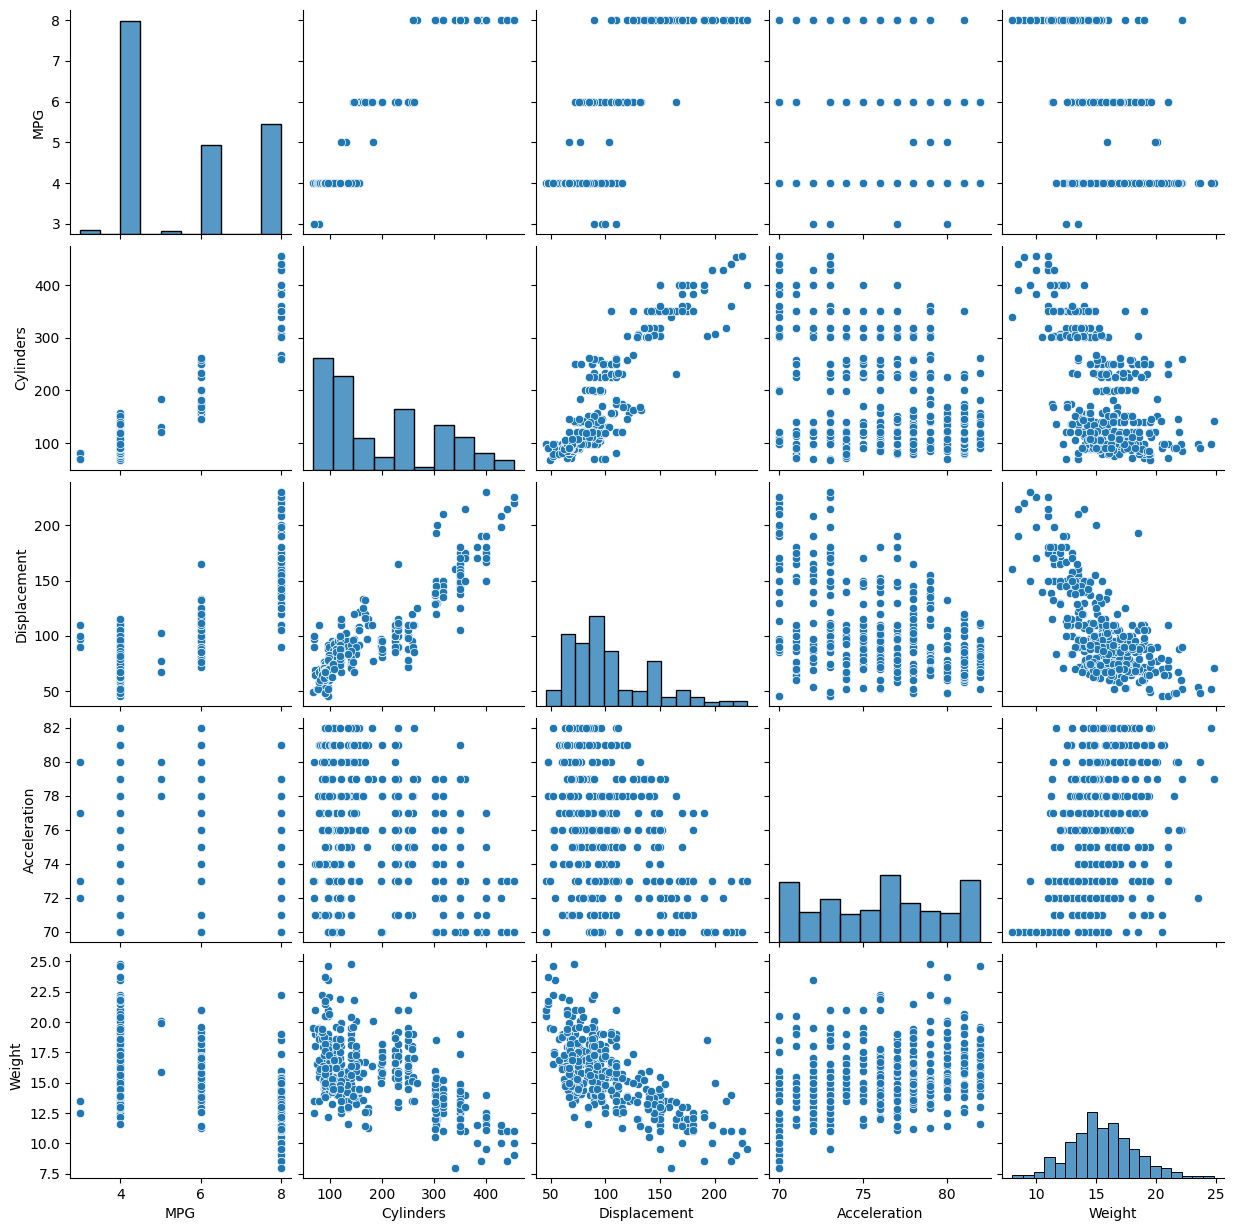

In [31]:
# Lets visualize the data

# /* YOUR CODE HERE*/
# Hint: Choose 5 NUMERICAL variables
sns.pairplot(new_dataset[["MPG","Cylinders","Displacement","Acceleration","Weight"]])

## 2) NN for a simple Regression

In [41]:
# Splitting dataset into training and testing
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables

# /* REPLACE 'None' WITH CODE YOUR CODE */
# Hint: Make sure you select only numerical variables.
# Feel free to choose the number of independent variables
# you want and the dependent variable is MPG
independent_variables = ["MPG","Cylinders","Displacement","Acceleration","Weight"]
dependent_variables = ["MPG"]

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [42]:
# Build your model!
# /* YOUR CODE HERE */
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(len(independent_variables),)),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),


  tf.keras.layers.Dense(units=len(dependent_variables), activation='relu'),
  ])


# Now compile the model!
# /* YOUR CODE HERE */
model.compile(
    loss='mse',
    optimizer='adam',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [43]:
# Now lets train the model!
# Hint: Feel free to change a few parameters
model.fit(train_set,
          train_target,
          epochs=15,
          batch_size = 128,
          validation_split=0.2
        )

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - loss: 31.3653 - root_mean_squared_error: 5.6003 - val_loss: 35.0635 - val_root_mean_squared_error: 5.9214
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 32.2169 - root_mean_squared_error: 5.6756 - val_loss: 35.0635 - val_root_mean_squared_error: 5.9214
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 32.0684 - root_mean_squared_error: 5.6627 - val_loss: 35.0635 - val_root_mean_squared_error: 5.9214
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 31.9304 - root_mean_squared_error: 5.6506 - val_loss: 35.0635 - val_root_mean_squared_error: 5.9214
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 31.8497 - root_mean_squared_error: 5.6435 - val_loss: 35.0635 - val_root_mean_squared_error: 5.9214
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 31.9564 - root_mean_squared_error: 5.6529 - val_loss: 35.0635 - val_root_mean_squared_error: 5.9214
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 

In [44]:
# Evaluate your model
model.evaluate(x=test_set, y=test_target, batch_size=128)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 34.6582 - root_mean_squared_error: 5.8871


[34.658226013183594, 5.8871235847473145]

# Classification

## 1) Dataset Preparations

In [46]:
'''
The dataset you are going to use is the following:
https://archive.ics.uci.edu/ml/datasets/Ecoli
'''

# Retrieve the dataset
# /* YOUR CODE HERE */
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data

--2025-02-23 03:36:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘ecoli.data’

ecoli.data              [ <=>                ]  19.03K  --.-KB/s    in 0.07s   

2025-02-23 03:36:28 (287 KB/s) - ‘ecoli.data’ saved [19488]



In [47]:
# Loading Dataset and have a glimpse about it
column_names = ['name','MCG','GVH','LIP', 'CHG', 'AAC', 'AML1', 'ALM2', 'class']

# /* YOUR CODE HERE */
# Hint: Make sure to check out the files first! And pay attention how data is separated
raw_dataset_ecoli= pd.read_csv("ecoli.data", names=column_names,
                      na_values = "?", comment='\t',
                      sep="\s+", skipinitialspace=True)
# Brief Statistical Summary of the dataset
raw_dataset_ecoli.describe()

,MCG,GVH,LIP,CHG,AAC,AML1,ALM2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


In [48]:
# Lets check columns
raw_dataset_ecoli.columns

Index(['name', 'MCG', 'GVH', 'LIP', 'CHG', 'AAC', 'AML1', 'ALM2', 'class'], dtype='object')

In [50]:
# Summary of the dataset
raw_dataset_ecoli.head()

,name,MCG,GVH,LIP,CHG,AAC,AML1,ALM2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [51]:
# Returns a form of (# rows, # columns)
raw_dataset_ecoli.shape

(336, 9)

In [52]:
# Lets make a copy
new_dataset = raw_dataset_ecoli.copy()

# Lets check for null values
# df.dropna()
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()

name     0
MCG      0
GVH      0
LIP      0
CHG      0
AAC      0
AML1     0
ALM2     0
class    0
dtype: int64


,name,MCG,GVH,LIP,CHG,AAC,AML1,ALM2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


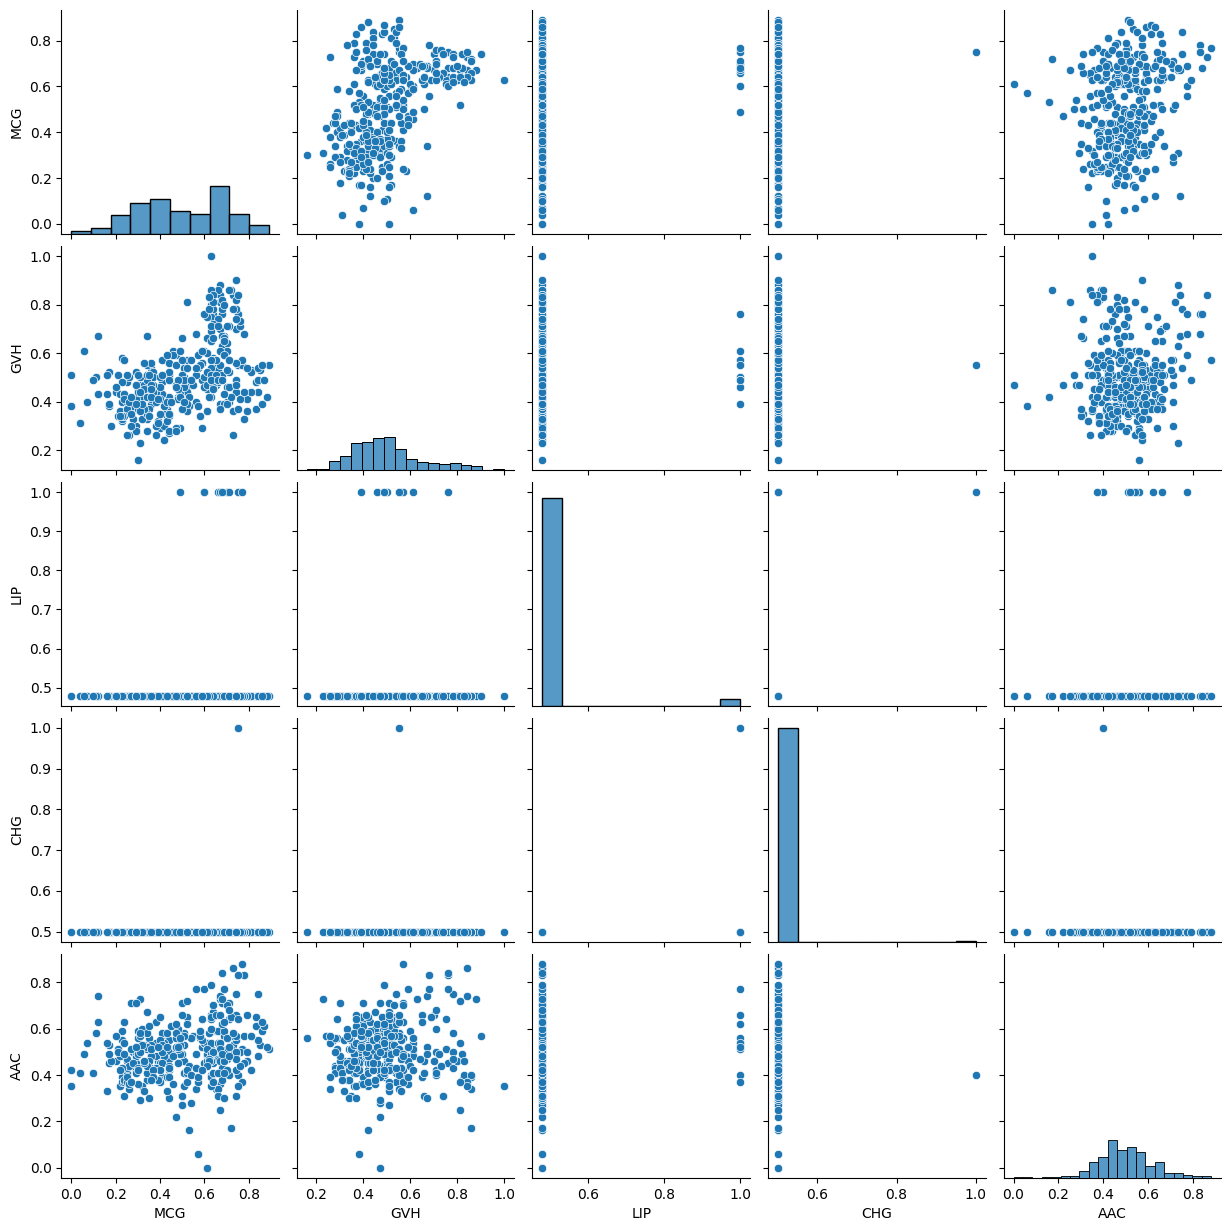

In [53]:
# Lets visualize the data

# /* YOUR CODE HERE*/
# Hint: Choose 5 NUMERICAL variables
sns.pairplot(new_dataset[["MCG","GVH","LIP","CHG","AAC"]])

In [59]:
# Splitting dataset into training and testing
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables

# /* REPLACE 'None' WITH CODE YOUR CODE */
# Hint: Make sure you select only numerical variables.
# Feel free to choose the number you want and the dependent variables is MPG
independent_variables = ['MCG','GVH','LIP', 'CHG', 'AAC', 'AML1', 'ALM2',]
dependent_variables = ['class']

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [60]:
train_target, test_target

(    class
 79     cp
 193    im
 70     cp
 322    pp
 51     cp
 ..    ...
 93     cp
 108    cp
 315    pp
 263    om
 325    pp
 
 [268 rows x 1 columns],
     class
 109    cp
 297    pp
 17     cp
 151    im
 96     cp
 ..    ...
 131    cp
 69     cp
 42     cp
 270    om
 224   imU
 
 [68 rows x 1 columns])

In [61]:
# NNs can't understand strings, we have to ENCODE them! (more next class)
train_target = pd.factorize(train_target['class'])[0]
test_target = pd.factorize(test_target['class'])[0]

## 2) NN for Classification

In [63]:
# Build your model!
# /* YOUR CODE HERE */
# Hint: Is this a binary or multiclassification problem?
# Get the number of unique classes in the target variable
num_classes = len(np.unique(train_target))  # Assuming train_target is already factorized

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(len(independent_variables),)),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=num_classes, activation='softmax')  # Set units to num_classes
])

# Now lets compile the model. NOTE: These are the finishing touches before having a fully functional model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
# Now compile the model!
# /* YOUR CODE HERE */

model.fit(train_set,
          train_target,
          epochs=25,
          batch_size=128,
          validation_split=0.2
        )

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 0.0000e+00 - loss: 2.0885 - val_accuracy: 0.0000e+00 - val_loss: 2.1070
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.0000e+00 - loss: 2.0735 - val_accuracy: 0.0000e+00 - val_loss: 2.1011
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.0000e+00 - loss: 2.0661 - val_accuracy: 0.0000e+00 - val_loss: 2.0938
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0296 - loss: 2.0614 - val_accuracy: 0.0370 - val_loss: 2.0855
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0624 - loss: 2.0512 - val_accuracy: 0.1296 - val_loss: 2.0771
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1169 - loss: 2.0398 - val_accuracy: 0.1481 - val_loss: 2.0690
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1263 - loss: 2.0283 - val_accuracy: 0.1481 - val_loss: 2.0609
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1279 - loss: 2.0210 - val_accuracy: 0.1667 - val

In [64]:
# Evaluate your model
model.evaluate(x=test_set, y=test_target, batch_size=128)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3971 - loss: 2.0691


[2.0691399574279785, 0.3970588147640228]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


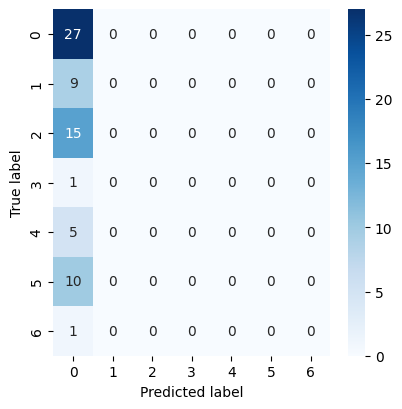

In [65]:
# Function that plots confusion matrix
def plot_confusion_matrix(labels, predictions):
  figure = plt.figure(figsize=(4, 4))
  sns.heatmap(confusion_matrix(labels=labels, predictions=predictions), annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Confusion Matrix
predictions = list(map(lambda x: np.argmax(x), model.predict(test_set)))

plot_confusion_matrix(labels=test_target, predictions=predictions)

# Conclusiones

After you are done with both previous models, make 3 different models for the regression problem and 3 for the classification problem.

Annotate the results in a Text Cell below this one (only the metrics shown in the evaluation phase) and then write a conclusion which model was the best for each problem.

# READ ME

When you are finished with your laboratory, remember to share it. Make the URL public for Galileo.edu domain or for everyone.
Also, remember to hit Ctrl+S to save your progress.